In [1]:
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import pandas as pd
import os
import anndata as ad
import scipy as sp

In [2]:
adata = sc.read_h5ad('../../results/01_cell_2022/scrna.skin.h5ad')

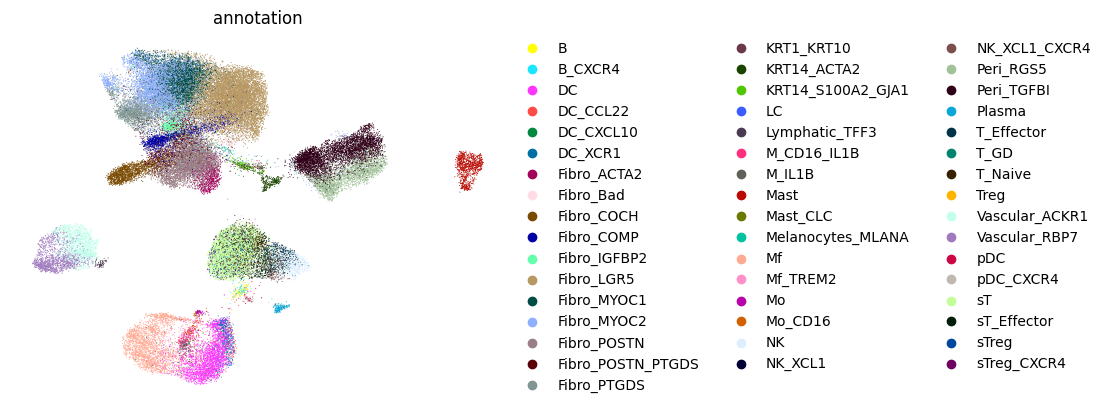

In [3]:
sc.pl.umap(adata, color=['annotation'], frameon=False)

In [4]:
adata.obs['annotation'].unique()

['Fibro_LGR5', 'Fibro_POSTN', 'Fibro_MYOC2', 'Peri_RGS5', 'Peri_TGFBI', ..., 'Mo_CD16', 'pDC', 'T_GD', 'Treg', 'Mast_CLC']
Length: 49
Categories (49, object): ['B', 'B_CXCR4', 'DC', 'DC_CCL22', ..., 'sT', 'sT_Effector', 'sTreg', 'sTreg_CXCR4']

In [5]:
adata.obs['cell_type'] = adata.obs['annotation']

In [6]:
############ Immune cells ##########
# T cells
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bsT_Effector\b', 'T cells', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bT_Effector\b', 'T cells', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bT_GD\b', 'T cells', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bT_Naive\b', 'T cells', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bsTreg_CXCR4\b', 'T cells', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bsTreg\b', 'T cells', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bTreg\b', 'T cells', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bsT\b', 'T cells', regex=True)

# NK cells
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bNK\b', 'NK cells', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bNK_XCL1\b', 'NK cells', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bNK_XCL1_CXCR4\b', 'NK cells', regex=True)

# pDC
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bpDC_CXCR4', 'pDC', regex=True)

# cDC
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bDC\b', 'cDC', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bDC_CCL22\b', 'cDC', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bDC_CXCL10\b', 'cDC', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bDC_XCR1\b', 'cDC', regex=True)

# macrophages
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bMf_TREM2\b', 'Macrophages', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bMf\b', 'Macrophages', regex=True)

# monocytes
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bMo_CD16\b', 'Monocytes', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bM_CD16_IL1B\b', 'Monocytes', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bM_IL1B\b', 'Monocytes', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bMo\b', 'Monocytes', regex=True)

# Langerhans cells
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bLC\b', 'Langerhans cells', regex=True)

# Mast cells
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bMast\b', 'Mast cells', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bMast_CLC\b', 'Mast cells', regex=True)


# B cells
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bB\b', 'B cells', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bB_CXCR4\b', 'B cells', regex=True)

# plasma cells
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bPlasma\b', 'Plasma cells', regex=True)

In [7]:
############ Stromal cells ##########

# Fibroblasts
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bFibro_ACTA2\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bFibro_Bad\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bFibro_COCH\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bFibro_COMP\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bFibro_IGFBP2\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bFibro_LGR5\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bFibro_MYOC1\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bFibro_MYOC2\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bFibro_POSTN\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bFibro_PTGDS\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bFibro_POSTN_PTGDS\b', 'Fibroblasts', regex=True)

# Pericytes
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bPeri_RGS5\b', 'Pericytes', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bPeri_TGFBI\b', 'Pericytes', regex=True)

# Vascular endothelial cells
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bVascular_ACKR1\b', 'Endothelial', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bVascular_RBP7\b', 'Endothelial', regex=True)

# Lymphatic
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bLymphatic_TFF3\b', 'Endothelial', regex=True)

# Melanocytes
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bMelanocytes_MLANA\b', 'Melanocytes', regex=True)

# Keratinocytes
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bKRT1_KRT10\b', 'Keratinocytes', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bKRT14_ACTA2\b', 'Keratinocytes', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\bKRT14_S100A2_GJA1\b', 'Keratinocytes', regex=True)

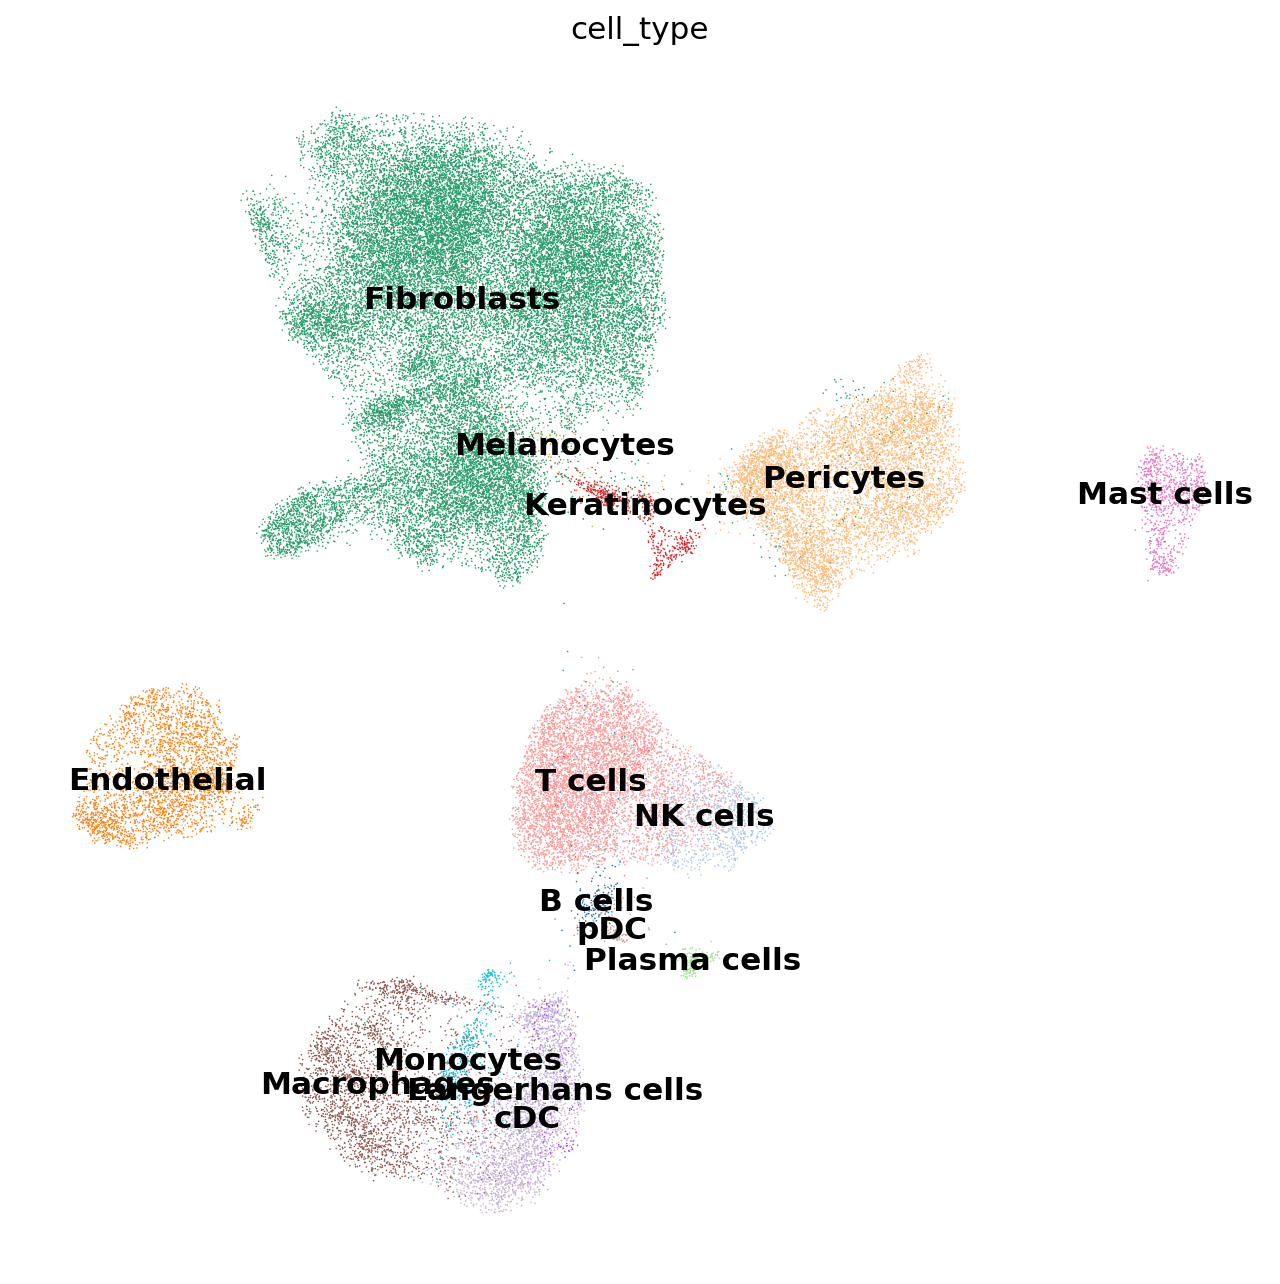

In [8]:
sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(adata, color=['cell_type'], frameon=False, legend_loc='on data')

In [9]:
adata.write_h5ad('../../results/01_cell_2022/scrna.skin.annotated.h5ad')